In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Models from Scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_raw = pd.read_csv("/kaggle/input/hr-analytics-dataset/HR_Analytics.csv")
df_raw.head()

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,RM297,18,18-25,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,...,3,80,0,0,2,3,0,0,0,0.0
1,RM302,18,18-25,No,Travel_Rarely,812,Sales,10,3,Medical,...,1,80,0,0,2,3,0,0,0,0.0
2,RM458,18,18-25,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,...,4,80,0,0,3,3,0,0,0,0.0
3,RM728,18,18-25,No,Non-Travel,287,Research & Development,5,2,Life Sciences,...,4,80,0,0,2,3,0,0,0,0.0
4,RM829,18,18-25,Yes,Non-Travel,247,Research & Development,8,1,Medical,...,4,80,0,0,0,3,0,0,0,0.0


In [3]:
df_raw.head()

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,RM297,18,18-25,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,...,3,80,0,0,2,3,0,0,0,0.0
1,RM302,18,18-25,No,Travel_Rarely,812,Sales,10,3,Medical,...,1,80,0,0,2,3,0,0,0,0.0
2,RM458,18,18-25,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,...,4,80,0,0,3,3,0,0,0,0.0
3,RM728,18,18-25,No,Non-Travel,287,Research & Development,5,2,Life Sciences,...,4,80,0,0,2,3,0,0,0,0.0
4,RM829,18,18-25,Yes,Non-Travel,247,Research & Development,8,1,Medical,...,4,80,0,0,0,3,0,0,0,0.0


In [4]:
# Memilih kolom-kolom yang diinginkan untuk x
x = df_raw[['EmployeeNumber', 'Age', 'JobLevel', 'MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany']]

# Memilih kolom 'PerformanceRating' sebagai y
y = df_raw['PerformanceRating']

In [5]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
data_num_scaled = df_raw.copy()
data_num_scaled[['Age','EmployeeNumber','JobLevel','MonthlyIncome','TotalWorkingYears','YearsAtCompany']] = scale.fit_transform(df_raw[['Age','EmployeeNumber','JobLevel','MonthlyIncome','TotalWorkingYears','YearsAtCompany']])
data_num_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmpID                     1480 non-null   object 
 1   Age                       1480 non-null   float64
 2   AgeGroup                  1480 non-null   object 
 3   Attrition                 1480 non-null   object 
 4   BusinessTravel            1480 non-null   object 
 5   DailyRate                 1480 non-null   int64  
 6   Department                1480 non-null   object 
 7   DistanceFromHome          1480 non-null   int64  
 8   Education                 1480 non-null   int64  
 9   EducationField            1480 non-null   object 
 10  EmployeeCount             1480 non-null   int64  
 11  EmployeeNumber            1480 non-null   float64
 12  EnvironmentSatisfaction   1480 non-null   int64  
 13  Gender                    1480 non-null   object 
 14  HourlyRa

In [6]:
# Menghapus beberapa kolom (ganti dengan nama-nama kolom yang ingin dihapus)
kolom_yang_dihapus = ['EmpID',
 'AgeGroup',
 'Attrition',
 'BusinessTravel',
 'DailyRate',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EmployeeCount',
 'EnvironmentSatisfaction',
 'Gender',
 'HourlyRate',
 'JobInvolvement',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'SalarySlab',
 'MonthlyRate',
 'NumCompaniesWorked',
 'Over18',
 'OverTime',
 'PercentSalaryHike',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']
df = df_raw.drop(columns=kolom_yang_dihapus)

In [7]:
#MENGHAPUS OUTLIERS
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df_1 = df[~((df < (Q1 - 1.5 * IQR )) | (df > (Q3 + 1.5* IQR))).any(axis=1)]
print(df.shape)
print(df_1.shape)

(1480, 7)
(1093, 7)


In [8]:
from sklearn.utils import resample
import pandas as pd

# Membuat dua DataFrame terpisah untuk kelas mayoritas dan minoritas
df_majority = df[df['PerformanceRating'] == 3]
df_minority = df[df['PerformanceRating'] == 4]

# Menentukan jumlah sampel yang ingin dihasilkan untuk kelas mayoritas (di sini, kita ingin jumlah sampel yang sama dengan kelas minoritas)
n_samples_minority = len(df_minority)
n_samples_majority = n_samples_minority

# Melakukan undersampling pada kelas mayoritas
df_majority_undersampled = resample(df_majority,
                                    replace=False,     # Sampling tanpa penggantian (undersampling)
                                    n_samples=n_samples_majority,  # Jumlah sampel yang sesuai dengan kelas minoritas
                                    random_state=42)   # Untuk hasil yang dapat direproduksi

# Menggabungkan kelas mayoritas yang telah diundersample dengan kelas minoritas
df_up = pd.concat([df_majority_undersampled, df_minority])

# Sekarang, df_up berisi DataFrame dengan kelas mayoritas yang telah diundersampling

In [9]:
df_up['PerformanceRating'].value_counts()

PerformanceRating
3    227
4    227
Name: count, dtype: int64

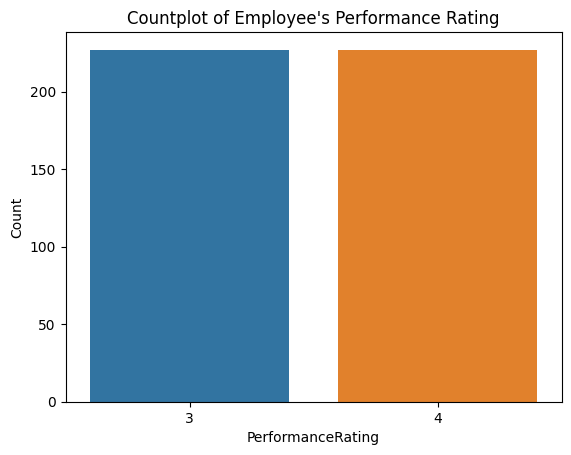

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Show countplot of 'enrolled' feature
sns.countplot(x='PerformanceRating', data=df_up)

# Optional: Add labels and title
plt.xlabel("PerformanceRating")
plt.ylabel("Count")
plt.title("Countplot of Employee's Performance Rating")

plt.show()

In [11]:
df_up.info()

<class 'pandas.core.frame.DataFrame'>
Index: 454 entries, 849 to 1479
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Age                454 non-null    int64
 1   EmployeeNumber     454 non-null    int64
 2   JobLevel           454 non-null    int64
 3   MonthlyIncome      454 non-null    int64
 4   PerformanceRating  454 non-null    int64
 5   TotalWorkingYears  454 non-null    int64
 6   YearsAtCompany     454 non-null    int64
dtypes: int64(7)
memory usage: 28.4 KB


In [12]:
# Memilih kolom-kolom yang diinginkan untuk x
x = df_up[['EmployeeNumber', 'Age', 'JobLevel', 'MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany']]

# Memilih kolom 'PerformanceRating' sebagai y
y = df_up['PerformanceRating']

# Menampilkan lima baris pertama dari x dan y
print("x:")
print(x.head())

print("y:")
print(y.head())

x:
      EmployeeNumber  Age  JobLevel  MonthlyIncome  TotalWorkingYears  \
849             1787   37         2           4189                  5   
1464            1938   58         4          17875                 29   
1262              64   48         3           5381                 23   
1088            1547   42         3          10124                 24   
1309             174   50         3           9208                 16   

      YearsAtCompany  
849                5  
1464               1  
1262               1  
1088              20  
1309               2  
y:
849     3
1464    3
1262    3
1088    3
1309    3
Name: PerformanceRating, dtype: int64


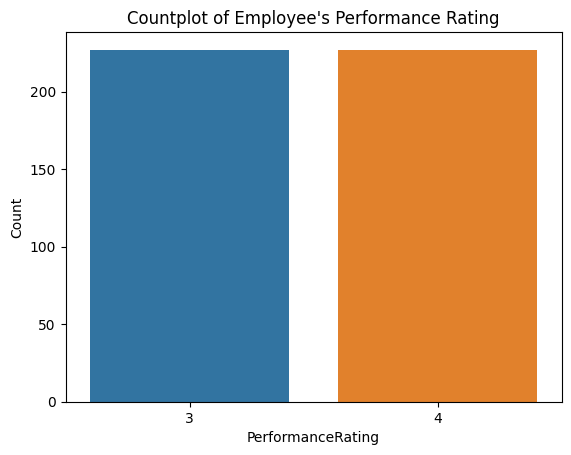

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Show countplot of 'enrolled' feature
sns.countplot(x='PerformanceRating', data=df_up)

# Optional: Add labels and title
plt.xlabel("PerformanceRating")
plt.ylabel("Count")
plt.title("Countplot of Employee's Performance Rating")

plt.show()

Text(0.5, 0, 'Age(years)')

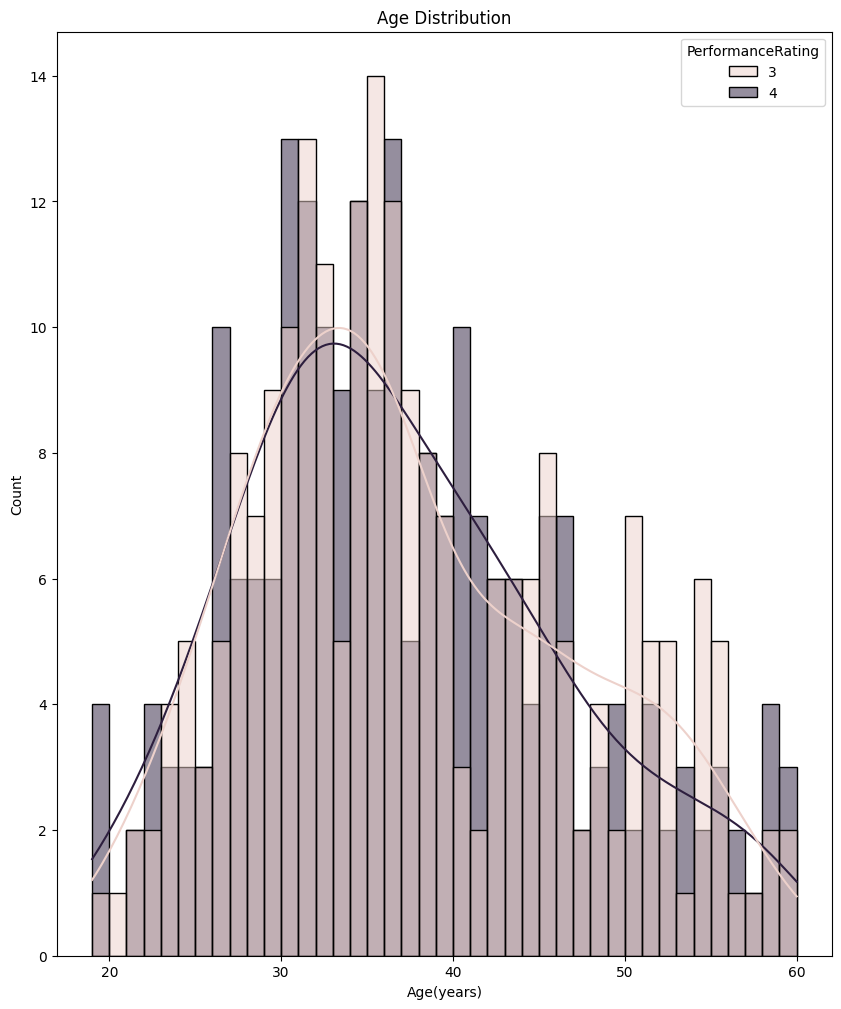

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

#figure size
plt.figure(figsize=(10,12))

#histogram
sns.histplot(data=df_up, x="Age", hue="PerformanceRating", binwidth=1, kde=True)

plt.title("Age Distribution")
plt.xlabel("Age(years)")

In [15]:
print("Missing Values:")
print(df_up.isna().sum())
print("-" * 50)
print("Duplicated Data Count:", df_up.duplicated().sum())

Missing Values:
Age                  0
EmployeeNumber       0
JobLevel             0
MonthlyIncome        0
PerformanceRating    0
TotalWorkingYears    0
YearsAtCompany       0
dtype: int64
--------------------------------------------------
Duplicated Data Count: 2


In [16]:
#SPLIT DATASET
x_train, x_test, y_train, y_test, = train_test_split(x,y, test_size=0.2)

In [17]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier()
random_forest_model.fit(x_train, y_train)

RandomForestClassifier()

In [18]:
# Melakukan prediksi dengan model Random Forest Classifier
y_predicted = random_forest_model.predict(x_test)

# Menampilkan 10 prediksi pertama
print(y_predicted[:10])

[3 4 3 4 4 4 4 4 4 4]


In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

model1=RandomForestClassifier()
# Matriks kebingungan (confusion matrix)
confusion = confusion_matrix(y_test, y_predicted)
print('\nConfusion Matrix:')
print(confusion)

# Akurasi
accuracy = accuracy_score(y_test, y_predicted)
print('\nAccuracy:')
print(accuracy)

# Laporan klasifikasi
classification_rep = classification_report(y_test, y_predicted)
print('\nClassification Report:')
print(classification_rep)


Confusion Matrix:
[[22 29]
 [13 27]]

Accuracy:
0.5384615384615384

Classification Report:
              precision    recall  f1-score   support

           3       0.63      0.43      0.51        51
           4       0.48      0.68      0.56        40

    accuracy                           0.54        91
   macro avg       0.56      0.55      0.54        91
weighted avg       0.56      0.54      0.53        91



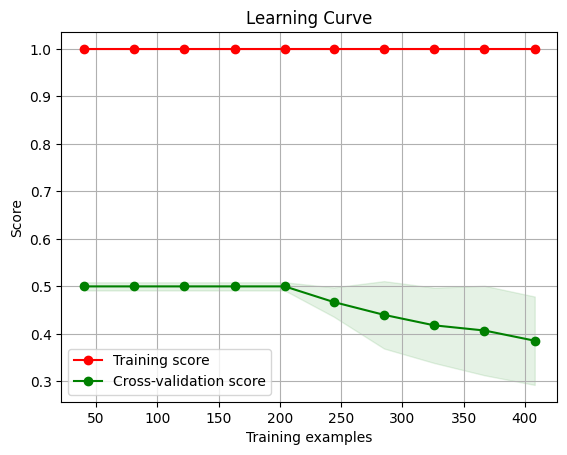

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier 

model = RandomForestClassifier()  

# Fungsi untuk membuat kurva pembelajaran
def plot_learning_curve(model, x, y, cv):
    train_sizes, train_scores, test_scores = learning_curve(
        model, x, y, cv=cv, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
    )

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure()
    plt.title("Learning Curve")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Panggil fungsi untuk membuat kurva pembelajaran
plot_learning_curve(model, x, y, cv=10)
plt.show()

In [21]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [22]:
# Melakukan prediksi dengan model Decision Tree Classifier
y_predicted = decision_tree_model.predict(x_test)

# Menampilkan 10 prediksi pertama
print(y_predicted[:10])

[4 4 3 4 3 4 4 4 3 4]


In [23]:
# Mendapatkan probabilitas prediksi kelas dari model Decision Tree Classifier
y_predicted_proba = decision_tree_model.predict_proba(x_test)

# Menampilkan 10 probabilitas pertama
print(y_predicted_proba[:10])

[[0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]]


In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


# Matriks kebingungan (confusion matrix)
confusion = confusion_matrix(y_test, y_predicted)
print('\nConfusion Matrix:')
print(confusion)

# Akurasi
accuracy = accuracy_score(y_test, y_predicted)
print('\nAccuracy:')
print(accuracy)

# Laporan klasifikasi
classification_rep = classification_report(y_test, y_predicted)
print('\nClassification Report:')
print(classification_rep)


Confusion Matrix:
[[24 27]
 [22 18]]

Accuracy:
0.46153846153846156

Classification Report:
              precision    recall  f1-score   support

           3       0.52      0.47      0.49        51
           4       0.40      0.45      0.42        40

    accuracy                           0.46        91
   macro avg       0.46      0.46      0.46        91
weighted avg       0.47      0.46      0.46        91



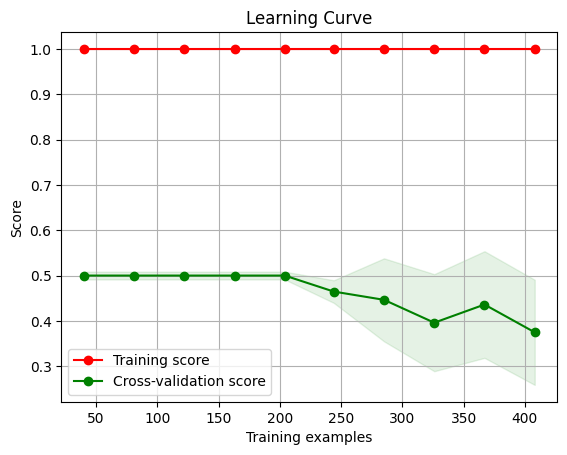

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier 

model = DecisionTreeClassifier()  

# Fungsi untuk membuat kurva pembelajaran
def plot_learning_curve(model, x, y, cv):
    train_sizes, train_scores, test_scores = learning_curve(
        model, x, y, cv=cv, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
    )

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure()
    plt.title("Learning Curve")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Panggil fungsi untuk membuat kurva pembelajaran
plot_learning_curve(model, x, y, cv=10)
plt.show()

In [26]:
#max_depth (KECIL MENNNN GUSH DIREFINING)
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Buat model Decision Tree dengan pengaturan max depth
max_depth = 3 # Ganti nilai max_depth sesuai dengan kebutuhan
decision_tree = DecisionTreeClassifier(max_depth=max_depth, random_state=42)

# Latih model pada data latih
decision_tree.fit(x_train, y_train)

# Lakukan prediksi pada data uji
y_pred = decision_tree.predict(x_test)

# Hitung akurasi
from sklearn.metrics import classification_report, confusion_matrix
print('\nconfustion matrix')
print(confusion_matrix(y_test, y_predicted))

accuracy = accuracy_score(y_test, y_pred)
print("Akurasi: {:.2f}%".format(accuracy * 100))

from sklearn.metrics import classification_report
print('\nclassification report')
print(classification_report(y_test, y_predicted))


confustion matrix
[[24 27]
 [22 18]]
Akurasi: 49.45%

classification report
              precision    recall  f1-score   support

           3       0.52      0.47      0.49        51
           4       0.40      0.45      0.42        40

    accuracy                           0.46        91
   macro avg       0.46      0.46      0.46        91
weighted avg       0.47      0.46      0.46        91



In [27]:
#model Bayes Naive (JELEK MENNN)
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report

model2 = GaussianNB()
# Misalkan Anda memiliki data X dan y
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Inisialisasi dan melatih model Gaussian Naive Bayes
nb_model = GaussianNB()

# Melakukan training
nb_model.fit(x_train, y_train)

# Melakukan prediksi pada data uji
y_predicted = nb_model.predict(x_test)

# Matriks kebingungan (confusion matrix)
print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y_predicted))

# Akurasi
accuracy = accuracy_score(y_test, y_predicted)
print('\nAccuracy: {:.2f}%'.format(accuracy * 100))

# Laporan klasifikasi
print('\nClassification Report:')
print(classification_report(y_test, y_predicted))


Confusion Matrix:
[[15 25]
 [22 29]]

Accuracy: 48.35%

Classification Report:
              precision    recall  f1-score   support

           3       0.41      0.38      0.39        40
           4       0.54      0.57      0.55        51

    accuracy                           0.48        91
   macro avg       0.47      0.47      0.47        91
weighted avg       0.48      0.48      0.48        91



In [28]:
#idih mampus bayes naive ganti random forest udh
from sklearn.model_selection import cross_validate
scores = cross_validate(model2, x, y, cv=10, scoring=('accuracy'))
scores['test_score'].mean()

0.2971980676328502

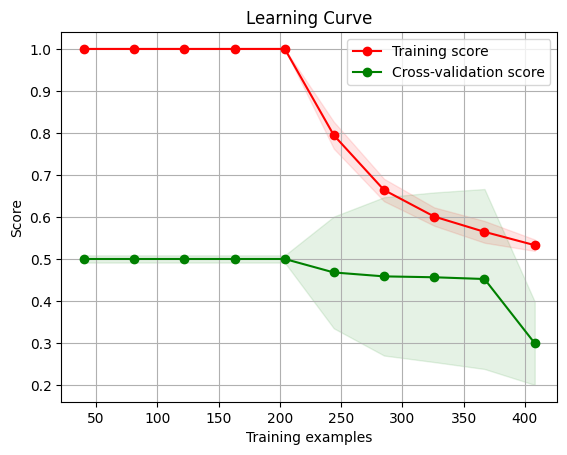

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

model = GaussianNB() 

# Fungsi untuk membuat kurva pembelajaran
def plot_learning_curve(model, x, y, cv):
    train_sizes, train_scores, test_scores = learning_curve(
        model, x, y, cv=cv, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
    )

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure()
    plt.title("Learning Curve")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Panggil fungsi untuk membuat kurva pembelajaran
plot_learning_curve(model, x, y, cv=10)
plt.show()

In [30]:
# model MLP Classifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

model3 = MLPClassifier()
# Misalkan Anda memiliki data X dan y
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Inisialisasi dan melatih model MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(4,16), max_iter=1000)

#melakukan training
mlp.fit(x_train, y_train)

# Melakukan prediksi pada data uji
y_predicted = mlp.predict(x_test)

# Matriks kebingungan (confusion matrix)
print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y_predicted))

# Akurasi
print('\nAccuracy:')
print(accuracy_score(y_test, y_predicted))

# Laporan klasifikasi
print('\nClassification Report:')
print(classification_report(y_test, y_predicted))


Confusion Matrix:
[[36  5]
 [46  4]]

Accuracy:
0.43956043956043955

Classification Report:
              precision    recall  f1-score   support

           3       0.44      0.88      0.59        41
           4       0.44      0.08      0.14        50

    accuracy                           0.44        91
   macro avg       0.44      0.48      0.36        91
weighted avg       0.44      0.44      0.34        91



In [31]:
from sklearn.model_selection import cross_validate
scores = cross_validate(model3, x, y, cv=10, scoring=('accuracy'))
scores['test_score'].mean()

0.48014492753623184

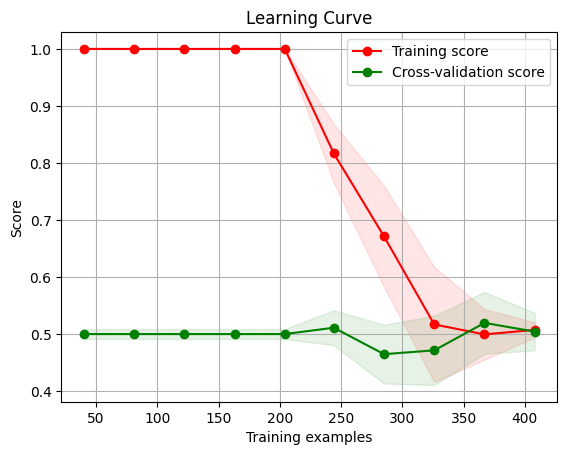

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Ganti 
model = MLPClassifier()  

# Fungsi untuk membuat kurva pembelajaran
def plot_learning_curve(model, x, y, cv):
    train_sizes, train_scores, test_scores = learning_curve(
        model, x, y, cv=cv, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
    )

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure()
    plt.title("Learning Curve")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Panggil fungsi untuk membuat kurva pembelajaran
plot_learning_curve(model, x, y, cv=10)
plt.show()

In [33]:
#K-Nearest Neighbors (20%)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score , classification_report, ConfusionMatrixDisplay,precision_score,recall_score, f1_score,roc_auc_score,roc_curve
models = KNeighborsClassifier()
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train.values.ravel())
training_prediction = knn.predict(x_train)
testing_prediction = knn.predict(x_test)

#Training Metrics
training_accuracy = accuracy_score(y_train, training_prediction)
training_f1 = f1_score(y_train, training_prediction, average = 'weighted')
training_precision = precision_score(y_train, training_prediction, average = 'weighted')
training_recall = recall_score(y_train, training_prediction, average = 'weighted')

#Testing Metrics
testing_accuracy = accuracy_score(y_test, testing_prediction)
testing_f1 = f1_score(y_test, testing_prediction, average = 'weighted')
testing_precision = precision_score(y_test, testing_prediction, average = 'weighted')
testing_recall = recall_score(y_test, testing_prediction, average = 'weighted')
print('AL : K-Nearest Neighbors (20%)')
print('\n')
print('Training Model Performance Check')
print('Accuracy Score : {:.4f}'.format(training_accuracy))
print('F1 Score : {:.4f}'.format(training_f1))
print('Precision Score : {:.4f}'.format(training_precision))
print('Recall Score : {:.4f}'.format(training_recall))

print('\n')
print('Testing Model Performance Check')
print('Accuracy Score : {:.4f}'.format(testing_accuracy))
print('F1 Score : {:.4f}'.format(testing_f1))
print('Precision Score : {:.4f}'.format(testing_precision))
print('Recall Score : {:.4f}'.format(testing_recall))

AL : K-Nearest Neighbors (20%)


Training Model Performance Check
Accuracy Score : 0.7521
F1 Score : 0.7521
Precision Score : 0.7525
Recall Score : 0.7521


Testing Model Performance Check
Accuracy Score : 0.5604
F1 Score : 0.5615
Precision Score : 0.5647
Recall Score : 0.5604


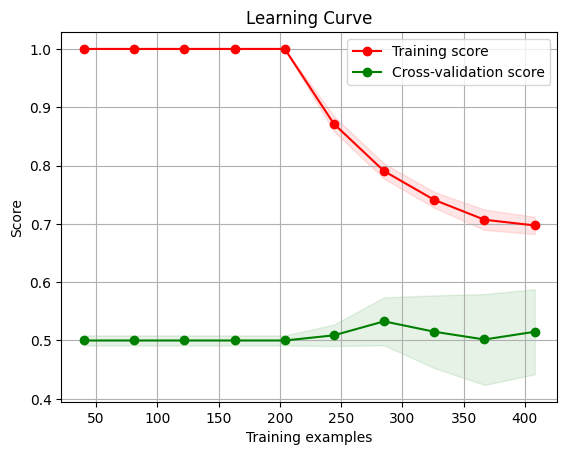

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Ganti 
model = KNeighborsClassifier() 

# Fungsi untuk membuat kurva pembelajaran
def plot_learning_curve(model, x, y, cv):
    train_sizes, train_scores, test_scores = learning_curve(
        model, x, y, cv=cv, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
    )

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure()
    plt.title("Learning Curve")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Panggil fungsi untuk membuat kurva pembelajaran
plot_learning_curve(model, x, y, cv=10)
plt.show()

In [35]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state = 789)
logreg.fit(x_train, y_train)

LogisticRegression(random_state=789)

In [36]:
y_predicted = logreg.predict(x_test)
y_predicted

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3,
       3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3])

In [37]:
y_predicted_proba = logreg.predict_proba(x_test)
y_predicted_proba[:10]

array([[0.51906221, 0.48093779],
       [0.50468435, 0.49531565],
       [0.54200231, 0.45799769],
       [0.51864907, 0.48135093],
       [0.5167115 , 0.4832885 ],
       [0.50370059, 0.49629941],
       [0.55410209, 0.44589791],
       [0.52057183, 0.47942817],
       [0.53957064, 0.46042936],
       [0.51924664, 0.48075336]])

In [38]:
from sklearn.metrics import classification_report, confusion_matrix
print('\nconfustion matrix')
print(confusion_matrix(y_test, y_predicted))

from sklearn.metrics import accuracy_score
print('\naccuracy')
print(accuracy_score(y_test, y_predicted))

from sklearn.metrics import classification_report
print('\nclassification report')
print(classification_report(y_test, y_predicted))


confustion matrix
[[39  2]
 [48  2]]

accuracy
0.45054945054945056

classification report
              precision    recall  f1-score   support

           3       0.45      0.95      0.61        41
           4       0.50      0.04      0.07        50

    accuracy                           0.45        91
   macro avg       0.47      0.50      0.34        91
weighted avg       0.48      0.45      0.32        91



In [39]:
from sklearn.model_selection import cross_validate
scores = cross_validate(model1, x, y, cv=10, scoring=('accuracy'))
scores['test_score'].mean()

0.3789855072463768